In [1]:

import pandas as pd
from pathlib import Path
import gzip
from plotnine import *
from socialgene.base.socialgene import SocialGene
from socialgene.neo4j.neo4j import GraphDriver 
from socialgene.config import env_vars
env_vars["NEO4J_URI"] = "bolt://localhost:7687"


In [2]:
%%time
with GraphDriver() as db:
    x= db.run(
        """
        MATCH (p1:protein)
        RETURN count(p1) as count
        """
    ).value()

print(f"{x[0]} proteins in the database")

2024-06-21 15:01:15 INFO     Connected to Neo4j database at bolt://localhost:7687                                                          ]8;id=511004;file:///home/chase/Documents/github/kwan_lab/socialgene/sgpy/socialgene/neo4j/neo4j.py\neo4j.py]8;;\:]8;id=909003;file:///home/chase/Documents/github/kwan_lab/socialgene/sgpy/socialgene/neo4j/neo4j.py#61\61]8;;\

304330794 proteins in the database
CPU times: user 7.14 ms, sys: 3.42 ms, total: 10.6 ms
Wall time: 285 ms


In [3]:
%%time
with GraphDriver() as db:
    x= db.run(
        """
        MATCH (p1:hmm)
        RETURN count(p1) as count
        """
    ).value()

print(f"{x[0]} HMM non-redundant models in the database")

25566 HMM non-redundant models in the database
CPU times: user 2.12 ms, sys: 65 µs, total: 2.18 ms
Wall time: 91.8 ms


In [4]:
%%time
with GraphDriver() as db:
    x= db.run(
        """
        MATCH ()-[r:ANNOTATES]->()
        RETURN count(r) as count
        """
    ).value()

print(f"{x[0]} HMM annotations in the database")

847850795 HMM annotations in the database
CPU times: user 2.2 ms, sys: 137 µs, total: 2.34 ms
Wall time: 78.4 ms


In [5]:
%%time
results = []
with GraphDriver() as db:
    df = db.run(
        """
        MATCH (h1:hmm)-[:SOURCE_DB]-(hs1:pfam) 
        RETURN hs1.name as name, hs1.description as description, h1.outdegree as outdegree order by outdegree 
        """
    ).to_df()



CPU times: user 419 ms, sys: 83 ms, total: 502 ms
Wall time: 1.83 s


In [6]:
import numpy as np
df['outdegree'] = np.log10(df['outdegree'])

/home/chase/miniconda3/envs/py312/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


/home/chase/miniconda3/envs/py312/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 101 rows containing non-finite values.


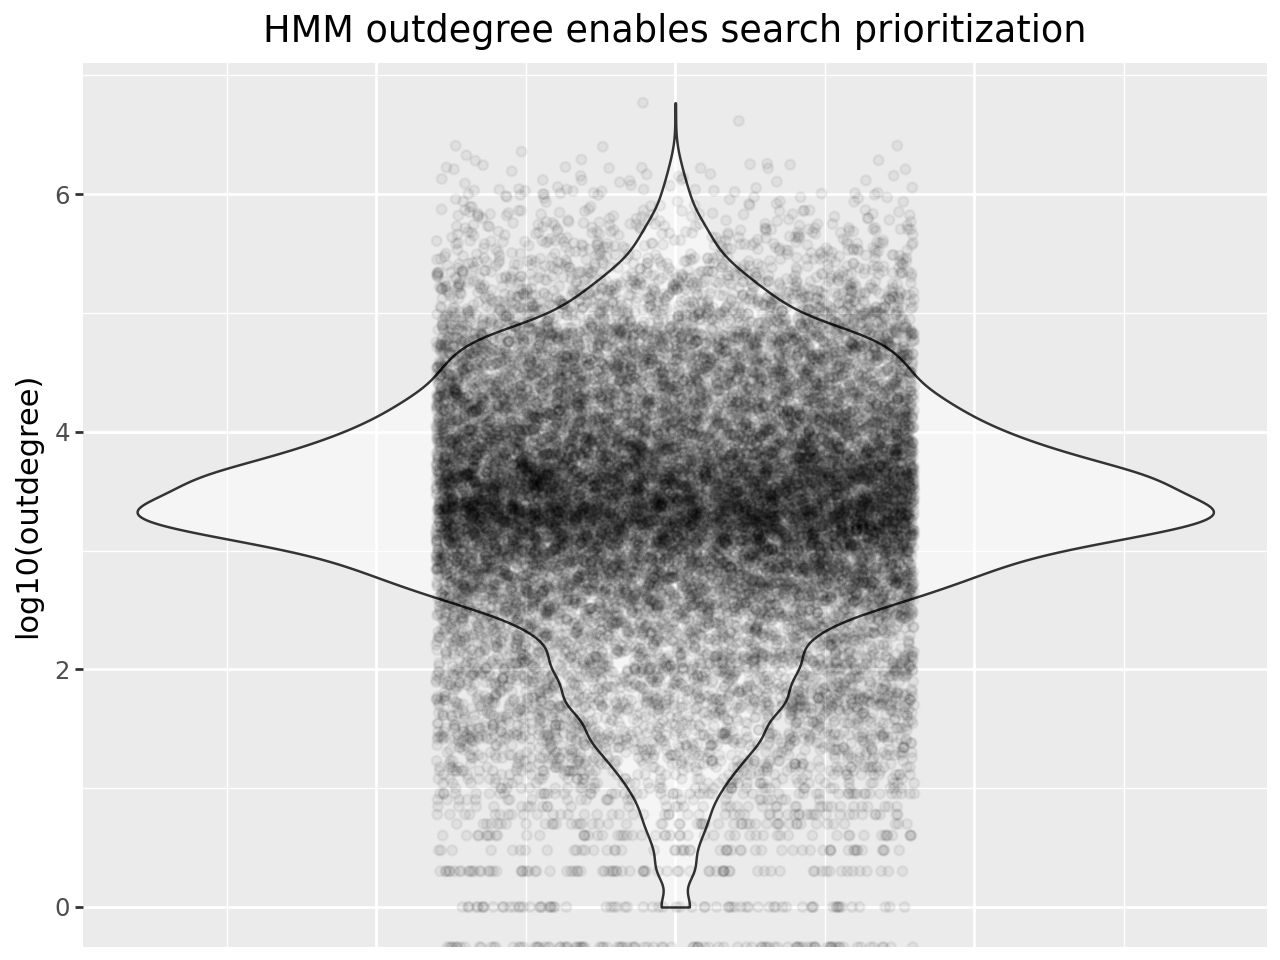

In [7]:
(
    ggplot(df, aes(x=0, y="outdegree")) +
      geom_violin( alpha=0.5) +
      geom_point(position = position_jitter( width = 0.2), alpha=0.05) +
      theme(axis_title_x=element_blank(),
                      axis_text_x=element_blank(),
                      axis_ticks_x=element_blank(),
                      ) +
      ylab("log10(outdegree)") +
      ggtitle("HMM outdegree enables search prioritization") +
      theme(plot_title = element_text(hjust = 0.5)) 
                      

)

In [75]:
%%time
results = []
with GraphDriver() as db:
    df = db.run(
        """
        MATCH (h1:hmm)-[:SOURCE_DB]-(hs1:pfam) 
        RETURN hs1.name as name, hs1.description as description, h1.outdegree as outdegree order by outdegree 
        """
    ).to_df()



CPU times: user 489 ms, sys: 69.8 ms, total: 559 ms
Wall time: 1.97 s


In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df

,name,description,outdegree
0,ACI44,Metallo-carboxypeptidase inhibitor,0
1,Acyl-CoA_dh_1,"Acyl-CoA dehydrogenase, C-terminal domain",0
2,Sperm_act_pep,Sperm-activating peptides,0
3,Aminotran_3,Aminotransferase class-III,0
4,Antimicrobial11,Formaecin family,0
...,...,...,...
19627,I-set,Immunoglobulin I-set domain,2512721
19628,BPD_transp_1,Binding-protein-dependent transport system inn...,2563482
19629,HATPase_c,"Histidine kinase-, DNA gyrase B-, and HSP90-li...",2567742
19630,zf-C2H2,"Zinc finger, C2H2 type",4147610


In [77]:
df['description'] = [' '.join(x) for x in df['description'].to_list()]
df.sort_values('outdegree', inplace=True, ascending=False)
data = df.head(10).set_index('description').to_dict()['outdegree']



In [79]:
df

,name,description,outdegree
19631,ABC_tran,A B C t r a n s p o r t e r,5887022
19630,zf-C2H2,"Z i n c f i n g e r , C 2 H 2 t y p e",4147610
19629,HATPase_c,"H i s t i d i n e k i n a s e - , D N A ...",2567742
19628,BPD_transp_1,B i n d i n g - p r o t e i n - d e p e n d e ...,2563482
19627,I-set,I m m u n o g l o b u l i n I - s e t d o ...,2512721
...,...,...,...
71,Beta_elim_lyase,B e t a - e l i m i n a t i n g l y a s e,0
72,Conotoxin_I2,I 2 - s u p e r f a m i l y c o n o t o x i n s,0
73,Cu,C u p i e n n i n,0
74,DUF6742,D o m a i n o f u n k n o w n f u n c t ...,0


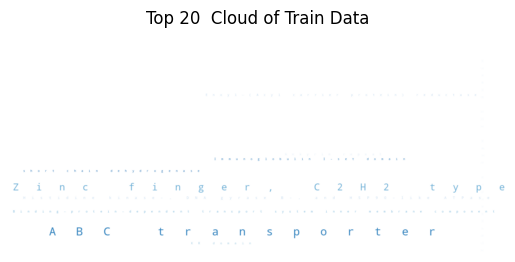

In [74]:
%matplotlib inline
wc = WordCloud(colormap='Blues',background_color='white',
                      collocations=True, width=1800, height=800, max_words=20, ).generate_from_frequencies(data)
plt.imshow(wc, interpolation="bilinear")
plt.title("Top 20  Cloud of Train Data")
plt.axis("off")
plt.show()

In [34]:
df['outdegree'] = np.log10(df['outdegree'])
df['description'] = [' '.join(x) for x in df['description'].to_list()]
data = df.set_index('description').to_dict()['outdegree']


/home/chase/miniconda3/envs/py312/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
